In [47]:
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from collections import OrderedDict
import h5py
# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

#Keras
import keras

import warnings
warnings.filterwarnings('ignore')

In [48]:
#Dictionary for genres label encoding:
genres = {'blues': 0, 'classical': 1, 'country': 2, 'disco': 3, 'hiphop': 4, 
          'jazz': 5, 'metal': 6, 'pop': 7, 'reggae': 8, 'rock': 9}

In [97]:
#cargo csvs:
data=pd.read_csv("./Features/features_augmented.csv")#training data
t1data=pd.read_csv("./Features/features_augmented_t1.csv")#test songs 1 row
t3data=pd.read_csv("./Features/features_augmented_t3.csv")#test songs 3 rows

In [120]:
X=data.drop('genre',axis=1)
Xt1=t1data.drop('genre',axis=1)
Xt3=t3data.drop('genre',axis=1)

In [121]:
y=data.genre
yt1=t1data.genre
yt3=t3data.genre

In [100]:
scaled_features = StandardScaler().fit_transform(X.values)
sc1=StandardScaler().fit_transform(Xt1.values)
sc3=StandardScaler().fit_transform(Xt3.values)

X = pd.DataFrame(scaled_features, index=X.index, columns=X.columns)
Xt1=pd.DataFrame(sc1, index=Xt1.index, columns=Xt1.columns)
Xt3=pd.DataFrame(sc3, index=Xt3.index, columns=Xt3.columns)

In [101]:
X.shape

(8910, 77)

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [106]:
from keras import models
from keras import layers

model1 = models.Sequential()

model1.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model1.add(layers.Dropout(rate=0.25, noise_shape=None, seed=None))
model1.add(layers.Dense(128, activation='relu'))
model1.add(layers.Dropout(rate=0.25, noise_shape=None, seed=None))
model1.add(layers.Dense(64, activation='relu'))
model1.add(layers.Dropout(rate=0.25, noise_shape=None, seed=None))
model1.add(layers.Dense(10, activation='softmax'))

In [107]:
model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [108]:
history = model1.fit(X_train,
                    y_train,
                    epochs=60,
                    batch_size=256,validation_split=0.1)

Train on 6415 samples, validate on 713 samples
Epoch 1/60
6415/6415 [==============================] - 2s 371us/step - loss: 1.9823 - acc: 0.2781 - val_loss: 1.4613 - val_acc: 0.4979
Epoch 2/60
6415/6415 [==============================] - 0s 62us/step - loss: 1.4771 - acc: 0.4602 - val_loss: 1.1214 - val_acc: 0.6438
Epoch 3/60
6415/6415 [==============================] - 0s 54us/step - loss: 1.2418 - acc: 0.5514 - val_loss: 0.9331 - val_acc: 0.7125
Epoch 4/60
6415/6415 [==============================] - 0s 60us/step - loss: 1.0808 - acc: 0.6193 - val_loss: 0.8178 - val_acc: 0.7335
Epoch 5/60
6415/6415 [==============================] - 0s 58us/step - loss: 0.9877 - acc: 0.6638 - val_loss: 0.7262 - val_acc: 0.7630
Epoch 6/60
6415/6415 [==============================] - 0s 55us/step - loss: 0.8980 - acc: 0.6884 - val_loss: 0.6741 - val_acc: 0.7952
Epoch 7/60
6415/6415 [==============================] - 0s 57us/step - loss: 0.8258 - acc: 0.7207 - val_loss: 0.6310 - val_acc: 0.8008
Epoch 8

In [109]:
test_loss, test_acc = model1.evaluate(X_test,y_test)

1782/1782 [==============================] - 0s 85us/step


In [110]:
print(test_loss, test_acc)

0.25669951081342834 0.9214365879025658


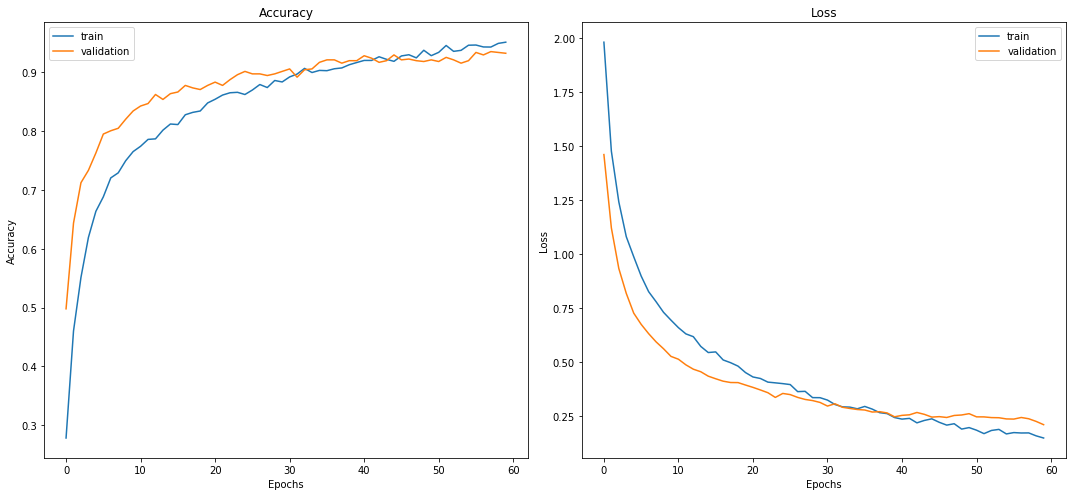

In [111]:
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='validation')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [112]:
#http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout(pad=0.4,w_pad=0.5,h_pad=1)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix


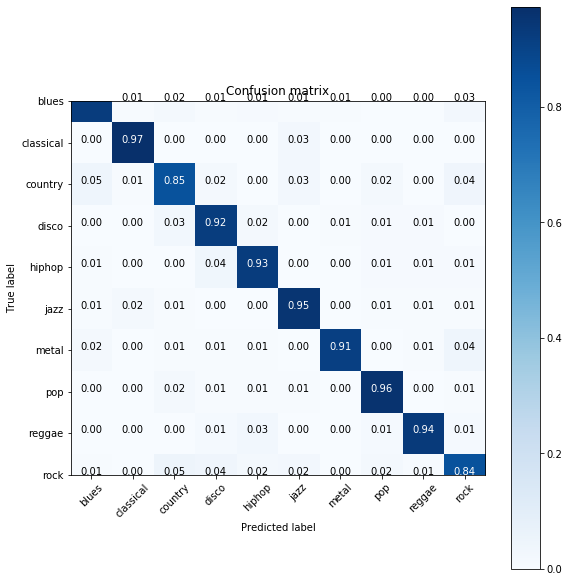

In [113]:
from sklearn.metrics import confusion_matrix
preds = model1.predict_classes(X_test)
cm = confusion_matrix(preds,y_test)
keys = OrderedDict(sorted(genres.items(), key=lambda t: t[1])).keys()

plt.figure(figsize=(8,8))
plot_confusion_matrix(cm, keys, normalize=True)

In [114]:
#
test_loss, test_acc = model1.evaluate(Xt1,yt1)
print(test_loss, test_acc)

10/10 [==============================] - 0s 1ms/step
0.4693319797515869 0.800000011920929


In [115]:
model1.predict_classes(Xt1)

array([2, 1, 2, 3, 4, 5, 6, 7, 9, 9])

In [116]:
test_loss, test_acc = model1.evaluate(Xt3,yt3)
print(test_loss, test_acc)

30/30 [==============================] - 0s 347us/step
0.7381046414375305 0.8666666746139526


In [118]:
test_loss, test_acc = model1.evaluate(X_test,y_test)
print(test_loss, test_acc)

1782/1782 [==============================] - 0s 95us/step
0.25669951081342834 0.9214365879025658


In [119]:
model1.save('./Models/FN_NN.h5')